In [28]:
#
# Cox-Ross-Rubinstein Binomial Model
# European Option Valuation
# 05_com/CRR_option_caluation.py
#
# (c) Dr. Yves J. Hilpisch
# Derivatives Analytics with Python
#
from cmath import exp
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from BSM_option_valuation import BSM_call_value

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 15}

mpl.rc('font', **font)





#
# Model Parameters
#
S0 = 100.0  # index level
K = 100.0  # option strike
T = 1.0  # maturity date
r = 0.05  # risk-less short rate
sigma = 0.2  # volatility


# Valuation Function
def CRR_option_value(S0, K, T, r, sigma, otype, M=4):
    ''' Cox-Ross-Rubinstein European option valuation.

    Parameters
    ==========
    S0 : float
        stock/index level at time 0
    K : float
        strike price
    T : float
        date of maturity
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    otype : string
        either 'call' or 'put'
    M : int
        number of time intervals
    '''
    # Time Parameters
    dt = T / M  # length of time interval
    df = math.exp(-r * dt)  # discount per interval

    # Binomial Parameters
    u = math.exp(sigma * math.sqrt(dt))  # up movement
    d = 1 / u  # down movement
    q = (math.exp(r * dt) - d) / (u - d)  # martingale branch probability

    # Array Initialization for Index Levels
    mu = np.arange(M + 1)
    mu = np.resize(mu, (M + 1, M + 1))
    md = np.transpose(mu)
    mu = u ** (mu - md)
    md = d ** md
    S = S0 * mu * md

    # Inner Values
    if otype == 'call':
        V = np.maximum(S - K, 0)  # inner values for European call option
    else:
        V = np.maximum(K - S, 0)  # inner values for European put option

    z = 0
    for t in range(M - 1, -1, -1):  # backwards iteration
        V[0:M - z, t] = (q * V[0:M - z, t + 1] +
                         (1 - q) * V[1:M - z + 1, t + 1]) * df
        z += 1
    return V[0, 0]


def Jarrow_Rudd_option_value(S0, K, T, r, sigma, otype, M=4):
    ''' Jarrow Rudd European option valuation.

        Parameters
    ==========
    S0 : float
        stock/index level at time 0
    K : float
        strike price
    T : float
        date of maturity
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    otype : string
        either 'call' or 'put'
    M : int
        number of time intervals
    '''

    # JR model modifies u and d 

        # Time Parameters
    dt = T / M  # length of time interval
    df = math.exp(-r * dt)  # discount per interval

    # Binomial Parameters
    u = math.exp((r - sigma**2/2) * dt + sigma*math.sqrt(dt))  # up movement
    d = math.exp((r - sigma**2/2) * dt - sigma*math.sqrt(dt))  # down movement
    q = .5  # equal probability using Jarrow-Rudd model

    # Array Initialization for Index Levels
    mu = np.arange(M + 1)
    mu = np.resize(mu, (M + 1, M + 1))
    md = np.transpose(mu)
    mu = u ** (mu - md)
    md = d ** md
    S = S0 * mu * md

    # Inner Values
    if otype == 'call':
        V = np.maximum(S - K, 0)  # inner values for European call option
    else:
        V = np.maximum(K - S, 0)  # inner values for European put option

    z = 0
    for t in range(M - 1, -1, -1):  # backwards iteration
        V[0:M - z, t] = (q * V[0:M - z, t + 1] +
                         (1 - q) * V[1:M - z + 1, t + 1]) * df
        z += 1
    return V[0, 0]


def Tian_option_value(S0, K, T, r, sigma, otype, M=4):
    ''' Tian European option valuation.

        Parameters
    ==========
    S0 : float
        stock/index level at time 0
    K : float
        strike price
    T : float
        date of maturity
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    otype : string
        either 'call' or 'put'
    M : int
        number of time intervals
    '''

    # Tiam model modifies u, d, q, and also needs v to be defined prior.

        # Time Parameters
    dt = T / M  # length of time interval
    df = math.exp(-r * dt)  # discount per interval

    # Binomial Parameters
    v = math.exp(sigma**2 * dt)           # Tiam model
    u = .5 * math.exp(r * dt) * v * (v + 1 + math.sqrt(v**2 + 2*v - 3))   # up movement
    d = .5 * math.exp(r * dt) * v * (v + 1 - math.sqrt(v**2 + 2*v - 3))   # down movement
    q = (math.exp(r * dt) - d) / (u - d)  # Tiam model

    # Array Initialization for Index Levels
    mu = np.arange(M + 1)
    mu = np.resize(mu, (M + 1, M + 1))
    md = np.transpose(mu)
    mu = u ** (mu - md)
    md = d ** md
    S = S0 * mu * md

    # Inner Values
    if otype == 'call':
        V = np.maximum(S - K, 0)  # inner values for European call option
    else:
        V = np.maximum(K - S, 0)  # inner values for European put option

    z = 0
    for t in range(M - 1, -1, -1):  # backwards iteration
        V[0:M - z, t] = (q * V[0:M - z, t + 1] +
                         (1 - q) * V[1:M - z + 1, t + 1]) * df
        z += 1
    return V[0, 0]



def plot_convergence(mmin, mmax, step_size):
    ''' Plots the CRR option values for increasing number of time
    intervals M against the Black-Scholes-Merton benchmark value.'''
    BSM_benchmark = BSM_call_value(S0, K, 0, T, r, sigma)
    m = range(mmin, mmax, step_size)
    CRR_values = [CRR_option_value(S0, K, T, r, sigma, 'call', M) for M in m]
    Jarrow_Rudd_values = [Jarrow_Rudd_option_value(S0, K, T, r, sigma, 'call', M) for M in m]
    Tian_values = [Tian_option_value(S0, K, T, r, sigma, 'call', M) for M in m]
    plt.figure(figsize=(12, 8))
    plt.plot(m, CRR_values, label='CRR values' )
    plt.plot(m, Jarrow_Rudd_values, label = 'Jarrow-Rudd values')
    plt.plot(m, Tian_values, label = 'Tian values')
    plt.axhline(BSM_benchmark, color='r', ls='dashed', lw=1.5,
                label='BSM benchmark')
    plt.xlabel('# of binomial steps $M$')
    plt.ylabel('European call option value')
    plt.legend(loc=4)
    plt.xlim(0, mmax)
    plt.plot()




done


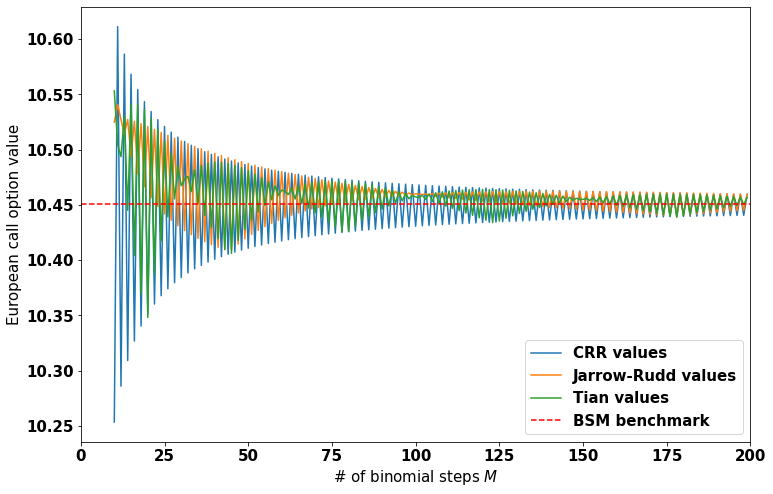

In [29]:
plot_convergence(10, 200, 1)
plt.show()